In [1]:
import numpy as np
import pandas as pd
from myffnnmodule.ffnet import *
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#load data
data = pd.read_csv('mnist_fashion/fashion-mnist_train.csv')

In [3]:
data = np.array(data)

In [4]:
y_labels = data[:,0]
y_labels.shape

(60000,)

In [5]:
x_train = data[:,1:data.shape[1]]
x_train = x_train.T
x_train = x_train/255
x_train.shape

(784, 60000)

In [6]:
fmnist = nnet(784,10)
fmnist.addLayer(24,activate=ReLu,weight_initializer=KaimingHe)
fmnist.addLayer(10,activate=ReLu,weight_initializer=KaimingHe)
fmnist.addLayer(10,activate=softMax)

In [7]:
fmnist.gradient_descent(x_train,y_labels,alpha=0.04,epoch=501)


---- Gradient descent ---------------------------------------------------
X input shape = 
 (784, 60000)

Y_target_labels shape input = 
 (60000,)
-------------------------------------------------------------------------

epoch :  0
Neural network accuracy of : 10.23%

epoch :  10
Neural network accuracy of : 18.0867%

epoch :  20
Neural network accuracy of : 23.3083%

epoch :  30
Neural network accuracy of : 30.6433%

epoch :  40
Neural network accuracy of : 30.3167%

epoch :  50
Neural network accuracy of : 37.28%

epoch :  60
Neural network accuracy of : 44.11%

epoch :  70
Neural network accuracy of : 48.585%

epoch :  80
Neural network accuracy of : 51.9967%

epoch :  90
Neural network accuracy of : 57.965%

epoch :  100
Neural network accuracy of : 63.5467%

epoch :  110
Neural network accuracy of : 65.665%

epoch :  120
Neural network accuracy of : 67.0483%

epoch :  130
Neural network accuracy of : 68.3767%

epoch :  140
Neural network accuracy of : 69.625%

epoch :  150
Neura

In [8]:
fmnist.network_shapes()


Shapes of Layer  1
	W[ 1 ] =  (24, 784)
	b[ 1 ] =  (24, 1)

Shapes of Layer  2
	W[ 2 ] =  (10, 24)
	b[ 2 ] =  (10, 1)

Shapes of Layer  3
	W[ 3 ] =  (10, 10)
	b[ 3 ] =  (10, 1)


In [11]:
data_test = pd.read_csv('mnist_fashion/fashion-mnist_test.csv')
data_test = np.array(data_test)
y_labels_test = data_test[:,0]
y_labels_test.shape
x_train_test = data_test[:,1:data_test.shape[1]]
x_train_test = x_train_test.T
x_train_test = x_train_test/255
print(x_train_test.shape)

print("\ntest prediction : ")
fmnist.feedForward(x_train)
accuracy = fmnist.network_accuracy(y_labels)*100
print('Neural network accuracy of : ',round(accuracy,4),'%',sep='')

(784, 10000)

test prediction : 
Neural network accuracy of : 80.2117%


(784, 1)


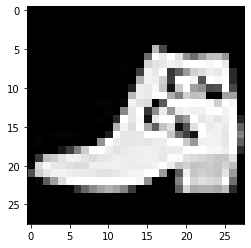

real label :  Ankle boot
predicted label :  Ankle boot


In [49]:
test_index = 5622
image_flat = np.array(x_train_test[:,test_index])
image_subject = np.array([image_flat]).T
print(image_subject.shape)
image = image_flat.reshape((28,28))
plt.imshow(image, interpolation='nearest')
plt.gray()
plt.show()

answer_label = fmnist.feedForward_output(image_subject)

maxval = -1
maxindex = -1
for i in range(fmnist.layers[-1].A.shape[0]):
    if fmnist.layers[-1].A[i,0] > maxval:
        maxval = fmnist.layers[-1].A[i,0]
        maxindex = i

labelsmap = {0:'T-shirt/top',1:'Trouser',2:'Pullover',3:'Dress',4:'Coat',5:'Sandal',6:'Shirt',7:'Sneaker',8:'Bag',9:'Ankle boot'}

print('real label : ',labelsmap[y_labels_test[test_index]])
print('predicted label : ',labelsmap[maxindex])